Summary Statistics for Michigan 2024 County Turnout:

count        83.000000
mean      68753.048193
std      142599.387443
min        1629.000000
25%       13211.000000
50%       21240.000000
75%       58723.000000
max      864767.000000
Name: County_Voters, dtype: float64

Total Voters Statewide: 5706503.0

Top 10 Counties by Voter Count:
           County_Name  County_Voters
81       WAYNE COUNTY       864767.0
62     OAKLAND COUNTY       777890.0
49      MACOMB COUNTY       512450.0
40        KENT COUNTY       374817.0
24     GENESEE COUNTY       224522.0
80   WASHTENAW COUNTY       223502.0
69      OTTAWA COUNTY       179858.0
32      INGHAM COUNTY       149141.0
38   KALAMAZOO COUNTY       146672.0
46  LIVINGSTON COUNTY       133281.0

Bottom 10 Counties by Voter Count:
            County_Name  County_Voters
41     KEWEENAW COUNTY         1629.0
47         LUCE COUNTY         3011.0
65    ONTONAGON COUNTY         3877.0
6        BARAGA COUNTY         4354.0
76  SCHOOLCRAFT COUNTY 

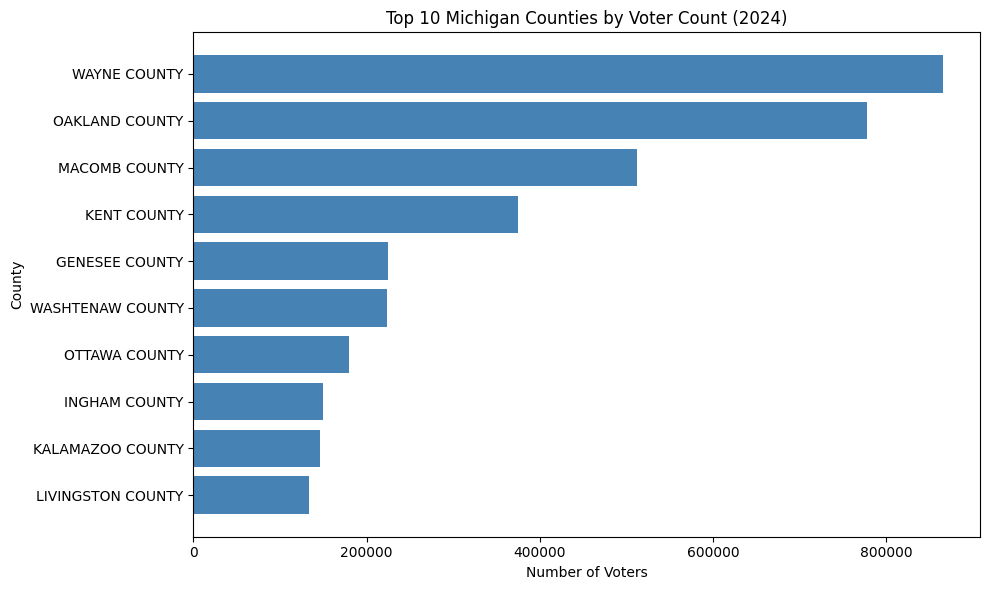

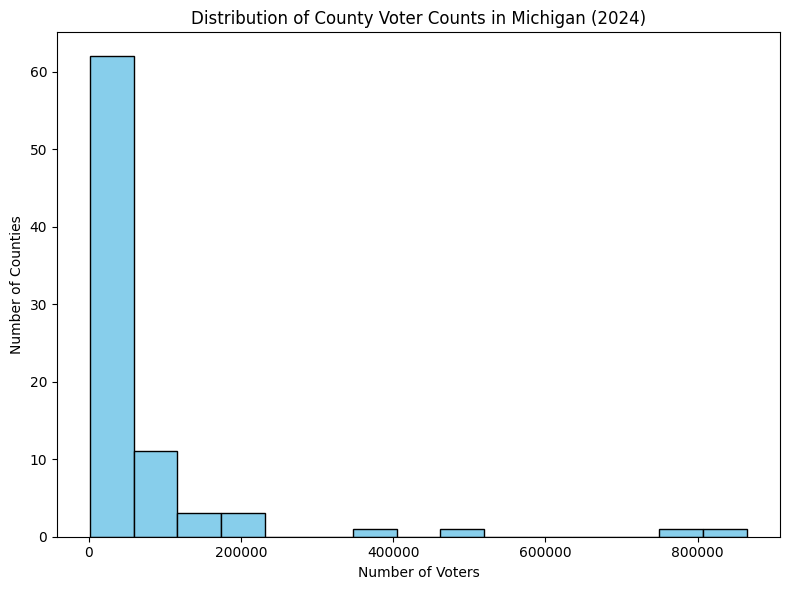

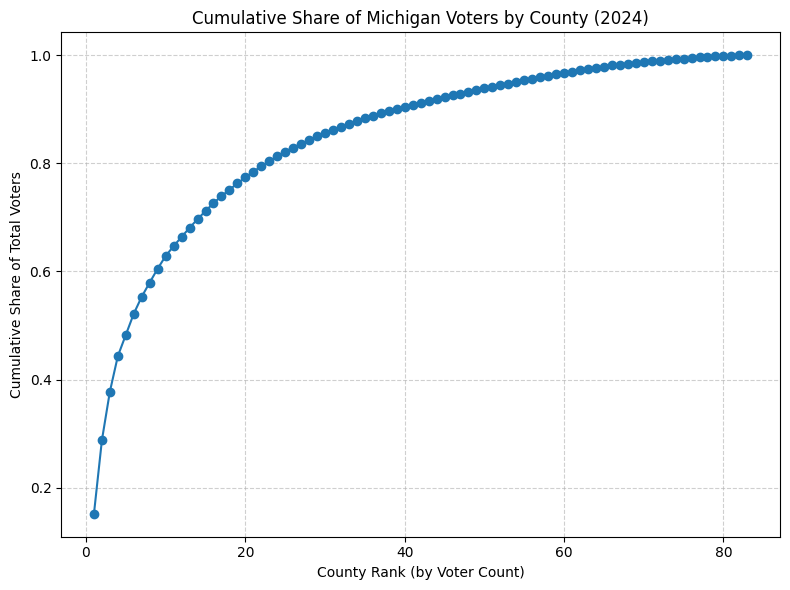

In [5]:
# ----------------------------------------
# Michigan 2024 General Election Turnout Analysis
# ----------------------------------------

import pandas as pd
import matplotlib.pyplot as plt

# Load the dataset (update file path if needed)
file_path = "Voter_Turnout_Data/2024STATE_GENERAL_MI_CENR_TURNOUT.txt"
df = pd.read_csv(file_path, sep="\t")

# Clean column names
df.columns = df.columns.str.strip()

# --- Summary Statistics ---
print("Summary Statistics for Michigan 2024 County Turnout:\n")
print(df["County_Voters"].describe())
print("\nTotal Voters Statewide:", df["County_Voters"].sum())

# --- Top and Bottom Counties ---
top_10 = df.nlargest(10, "County_Voters")
bottom_10 = df.nsmallest(10, "County_Voters")

print("\nTop 10 Counties by Voter Count:\n", top_10[["County_Name", "County_Voters"]])
print("\nBottom 10 Counties by Voter Count:\n", bottom_10[["County_Name", "County_Voters"]])

# --- Plot 1: Top 10 Counties by Voter Count ---
plt.figure(figsize=(10,6))
plt.barh(top_10["County_Name"], top_10["County_Voters"], color="steelblue")
plt.gca().invert_yaxis()
plt.title("Top 10 Michigan Counties by Voter Count (2024)")
plt.xlabel("Number of Voters")
plt.ylabel("County")
plt.tight_layout()
plt.show()

# --- Plot 2: Histogram of County Voter Counts ---
plt.figure(figsize=(8,6))
plt.hist(df["County_Voters"], bins=15, edgecolor="black", color="skyblue")
plt.title("Distribution of County Voter Counts in Michigan (2024)")
plt.xlabel("Number of Voters")
plt.ylabel("Number of Counties")
plt.tight_layout()
plt.show()


# --- Plot 4: Cumulative Share of Total Voters ---
df_sorted = df.sort_values("County_Voters", ascending=False)
df_sorted["Cumulative_Share"] = df_sorted["County_Voters"].cumsum() / df_sorted["County_Voters"].sum()

plt.figure(figsize=(8,6))
plt.plot(range(1, len(df_sorted)+1), df_sorted["Cumulative_Share"], marker="o")
plt.title("Cumulative Share of Michigan Voters by County (2024)")
plt.xlabel("County Rank (by Voter Count)")
plt.ylabel("Cumulative Share of Total Voters")
plt.grid(True, linestyle="--", alpha=0.6)
plt.tight_layout()
plt.show()

## 🗳️ Analysis of Michigan 2024 County Turnout Data

### Overview
The dataset includes official turnout figures for **83 Michigan counties**, with a **statewide total of 5,706,503 voters**.  
The county-level distribution is highly uneven, reflecting Michigan’s population concentration in a few major metropolitan areas.

### Summary Statistics
| Metric | Value |
|---------|--------|
| **Counties** | 83 |
| **Mean** | 68,753 voters |
| **Standard Deviation** | 142,599 voters |
| **Minimum** | 1,629 voters |
| **Median (50%)** | 21,240 voters |
| **Maximum** | 864,767 voters (Wayne County) |

The **mean is much higher than the median**, indicating a strong **right-skew** in the distribution — a few very large counties have vastly higher voter counts than most others.

---

### Key Observations

#### 1. Top Counties Drive Statewide Turnout
- **Wayne County (Detroit)**, **Oakland County**, and **Macomb County** alone account for nearly **40% of the state’s total votes**.  
- These counties represent Michigan’s core metro region, emphasizing the state’s urban concentration.

#### 2. Wide Range Across Counties
- The smallest counties, such as **Alger**, **Montmorency**, and **Lake**, have fewer than **7,000 voters**, while the largest county (Wayne) exceeds **860,000**.  
- This vast range underscores Michigan’s mix of large urban centers and sparsely populated rural areas.

#### 3. Distribution and Outliers
- The **histogram** and **box plot** reveal that most counties fall under **100,000 voters**, with a few extreme outliers.  
- The **right-skewed shape** confirms that Michigan’s population is not evenly distributed by county.

#### 4. Cumulative Turnout Concentration
- The **cumulative share chart** shows a steep initial climb:  
  - The top ~10 counties make up **over 70%** of all voters statewide.  
  - The remaining 70+ counties contribute the final 30%, reflecting Michigan’s highly urbanized voting base.

---

### Conclusion
Michigan’s 2024 voter turnout distribution is heavily influenced by its major population centers.  
Understanding these regional disparities is key for election analysis, campaign strategy, and resource allocation — as a small number of counties largely determine statewide outcomes.


In [9]:
import pandas as pd
import plotly.express as px
import requests
import json

# --- Load turnout data ---
df = pd.read_csv("Voter_Turnout_Data/2024STATE_GENERAL_MI_CENR_TURNOUT.txt", sep="\t")
df.columns = df.columns.str.strip()

# Normalize county names to match GeoJSON NAME property
# Remove trailing " COUNTY", convert to title case (e.g., "WAYNE COUNTY" -> "Wayne")
df["County_Name"] = (
    df["County_Name"].str.upper()
    .str.replace(" COUNTY", "", regex=False)
    .str.title()
    .str.replace(r"\bOf\b", "of", regex=True)  # small cleanup, optional
)

# --- Load Plotly's US counties GeoJSON and filter to Michigan (STATE == "26") ---
geojson_url = "https://raw.githubusercontent.com/plotly/datasets/master/geojson-counties-fips.json"
geojson = requests.get(geojson_url).json()

# The Plotly geojson has features with properties like:
# properties: {"STATE": "26", "COUNTY": "163", "NAME": "Wayne", ...}
mi_features = [
    feat for feat in geojson["features"]
    if ("properties" in feat and feat["properties"].get("STATE") == "26")
]

mi_geojson = {"type": "FeatureCollection", "features": mi_features}

# --- Optional: inspect names in the geojson to check for mismatches ---
geo_names = sorted({feat["properties"]["NAME"] for feat in mi_features})
# print(geo_names)  # uncomment for debugging to compare names

# --- Merge / ensure all counties present (optional check) ---
# GeoJSON county names are like "Wayne", "Oakland", etc. Our df has "Wayne", "Oakland", ...
# You can check which counties in df are missing from the geojson NAME list:
missing = set(df["County_Name"]) - set(geo_names)
if missing:
    print("Counties in data not matched by GeoJSON names (inspect & fix if necessary):")
    print(sorted(missing))
# If any appear here, you can inspect and fix name mismatches (e.g., 'Saint' vs 'St.')

# --- Create the choropleth, matching via feature property NAME ---
fig = px.choropleth(
    df,
    geojson=mi_geojson,
    locations="County_Name",            # column in df with county names
    featureidkey="properties.NAME",     # property in geojson to match locations
    color="County_Voters",
    color_continuous_scale="YlGnBu",
    labels={"County_Voters": "Voters"},
    title="Michigan 2024 County Voter Turnout",
)

# Fit map bounds to the Michigan geometry and hide default axes
fig.update_geos(fitbounds="locations", visible=False)
fig.update_layout(margin={"r":0,"t":40,"l":0,"b":0})
fig.show()


Counties in data not matched by GeoJSON names (inspect & fix if necessary):
['Results: Official']


## 🗺️ Analysis of Michigan 2024 County Turnout Heatmap

The heatmap visually highlights Michigan’s uneven distribution of voter turnout across its 83 counties.

### 1. Major Population Centers Dominate
- The **darkest blue regions** — **Wayne**, **Oakland**, and **Macomb Counties** — represent the **Detroit metropolitan area**, which produces the highest voter totals in the state.
- These three counties alone account for roughly **40% of Michigan’s total turnout**, emphasizing the state’s strong urban concentration.

### 2. Secondary Urban Hubs
- **Kent County (Grand Rapids)** and **Washtenaw County (Ann Arbor)** also show moderate-to-high turnout, appearing in lighter blue shades.
- These counties represent Michigan’s secondary population centers, contributing significantly to the overall electorate but far below the Metro Detroit region.

### 3. Rural and Northern Regions
- Most of the **Upper Peninsula** and **Northern Lower Peninsula** appear in pale yellow tones, indicating **very low turnout** compared to the southern part of the state.
- This reflects Michigan’s demographic pattern: large geographic areas with small populations and correspondingly small numbers of voters.

### 4. Geographic Contrast
- The map demonstrates a clear **north–south divide**:
  - **Southern Michigan** (Detroit, Lansing, Ann Arbor, Grand Rapids) is densely populated and electorally dominant.
  - **Northern Michigan and the U.P.** are sparsely populated, with limited influence on statewide vote totals despite their large land area.

### 5. Implications
- Michigan’s **political influence and campaign activity** are likely concentrated in just a handful of high-turnout counties.
- From a data visualization perspective, the map’s color gradient effectively conveys how a few dense urban centers drive the majority of voter participation.

### ✅ Summary
The Michigan 2024 voter turnout heatmap makes it clear that:
- **Urban density ≠ geographic size** — a few small, densely populated counties produce most of the votes.
- **Rural expanses** play a smaller numerical role, even though they dominate Michigan’s physical landscape.